<a href="https://colab.research.google.com/github/ashupandey217/LGMVIP-DataScience/blob/main/EDA_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the required libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing and understanding the data**

In [2]:
#The data string is of latin1 encoding instead of UTF-8 encoding
data=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="latin1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
data.shape

(181691, 135)

In [7]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

**Cleaning the data**

In [8]:
#including the required colums only
data=data[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [9]:
#renaming the columns
data.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)
data.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [10]:
data.info

<bound method DataFrame.info of         Year  Month  Day  ... Killed Wounded Add Notes
0       1970      7    2  ...    1.0     0.0       NaN
1       1970      0    0  ...    0.0     0.0       NaN
2       1970      1    0  ...    1.0     0.0       NaN
3       1970      1    0  ...    NaN     NaN       NaN
4       1970      1    0  ...    NaN     NaN       NaN
...      ...    ...  ...  ...    ...     ...       ...
181686  2017     12   31  ...    1.0     2.0       NaN
181687  2017     12   31  ...    2.0     7.0       NaN
181688  2017     12   31  ...    0.0     0.0       NaN
181689  2017     12   31  ...    0.0     0.0       NaN
181690  2017     12   31  ...    0.0     0.0       NaN

[181691 rows x 19 columns]>

In [11]:
data.shape

(181691, 19)

In [12]:
#checking for missing values
data.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [13]:
#filling the missing values with 0's for only those columns which we need
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)
#creating new column for casualities
data["Casualty"]=data["Killed"]+data["Wounded"]

In [14]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


**Observations:**
1. The data consists of terrorist activities ranging from the year: 1970 to 2017
2. Maximum number of people killed in an event were: 1570
3. Maximum number of people wounded in an event were: 8191
4. Maximum number of total casualties in an event were: 95741

# **EXPLORATRY DATA ANALYSIS**

**Visualizing the data**

**1. Attacks(Year-wise)**



(a) Number of attacks in year:

In [87]:
attacks=data["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


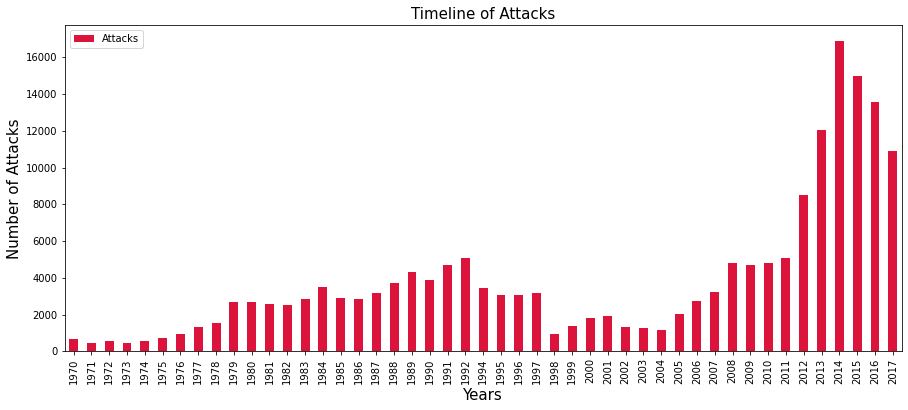

In [15]:
attacks.plot(kind="bar",color="crimson",figsize=(15,6))
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(b) Total Casualties (Killed + Wounded) in each Year

In [90]:
yc=data[["Year","Casualty"]].groupby("Year").sum()
yc

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0
1975,1234.0
1976,1430.0
1977,974.0
1978,3059.0


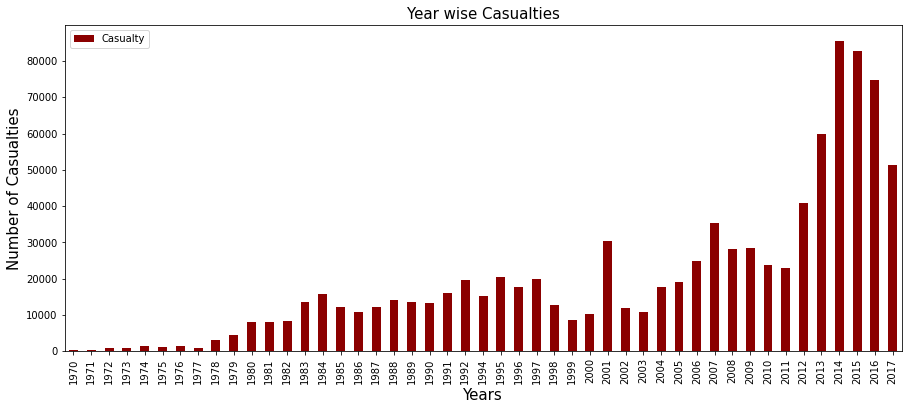

In [17]:
yc.plot(kind="bar",color="darkred",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

(c) Killed and wounded each Year

In [89]:
#killed
yk=data[["Year","Killed"]].groupby("Year").sum()
yk

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0
1975,617.0
1976,674.0
1977,456.0
1978,1459.0


In [88]:
#wounded
yw=data[["Year","Wounded"]].groupby("Year").sum()
yw

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0
1975,617.0
1976,756.0
1977,518.0
1978,1600.0


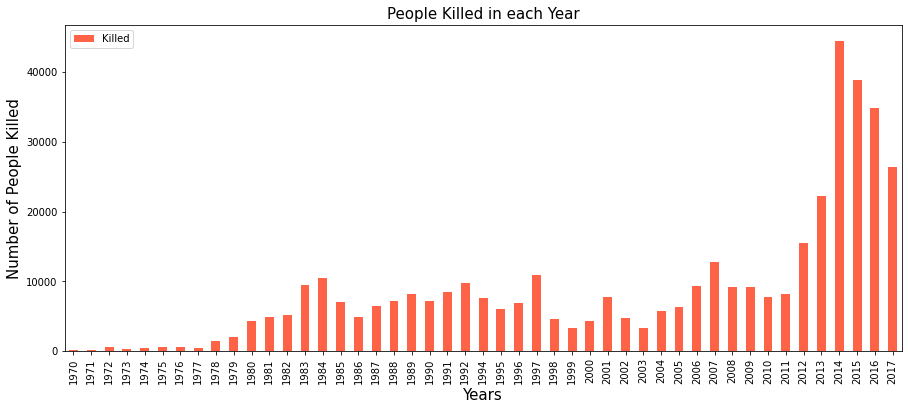

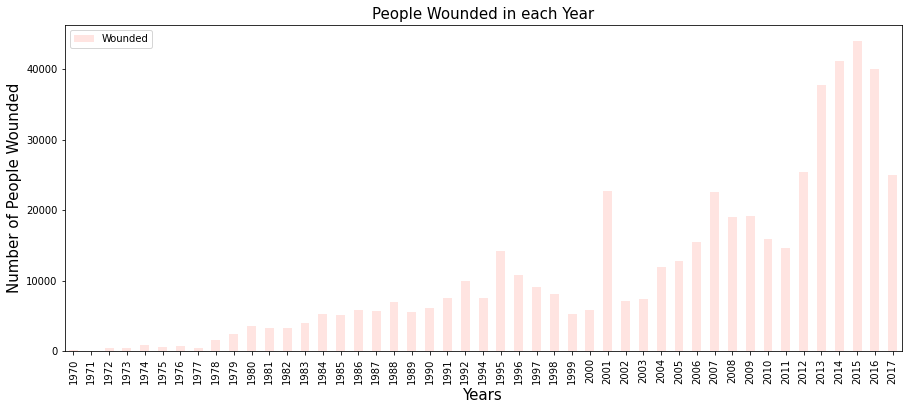

In [20]:
#Killed
yk.plot(kind="bar",color="tomato",figsize=(15,6))
plt.title("People Killed in each Year",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of People Killed",fontsize=15)

#Wounded
yw.plot(kind="bar",color="mistyrose",figsize=(15,6))
plt.title("People Wounded in each Year",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of People Wounded",fontsize=15)

plt.show()

**Observations from Year-wise attack:**

  (a) Attacks

    (i) Most number of attacks: 16903 in 2014

    (ii) Least number of attacks: 471 in 1971

  (b) Casualties

    (i) Most number of casualties: 85618 in 2014

    (ii) Least number of casualties: 255 in 1971

  (c) Killed & Wounded

    (i) Most number of people killed: 44490 in 2014

    (ii) Least number of people killed: 173 in 1971

    (iii) Most number of people wounded: 44043 in 2015

    (iv) Least number of people wounded: 82 in 1971





**2. Attacks(Region-wise)**


(a) Terrorist Attacks over Regions from 1970-2017

In [91]:
reg=data["Region"].value_counts()
reg

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

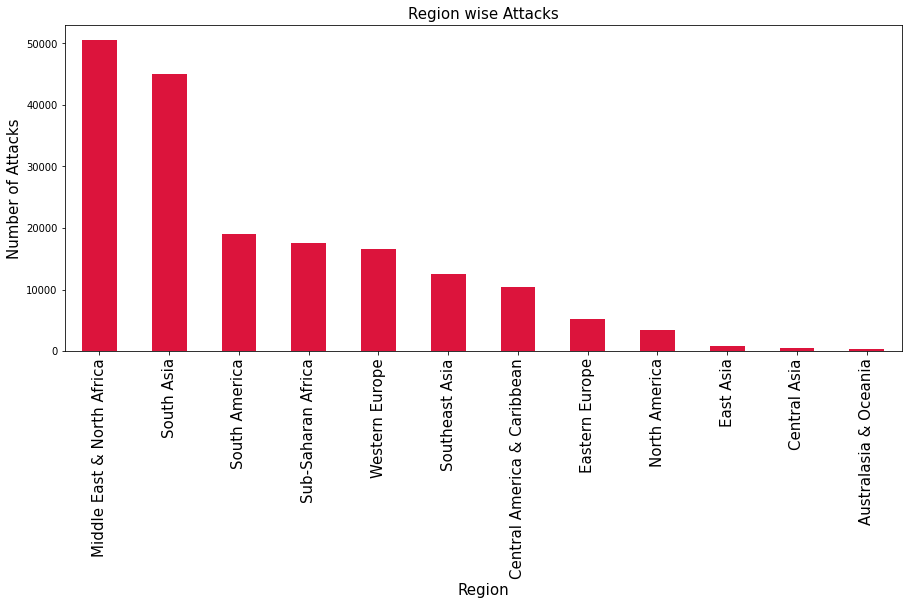

In [21]:
reg.plot(kind="bar",color="crimson",figsize=(15,6))
plt.title("Region wise Attacks",fontsize=15)
plt.xlabel("Region",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(b) Total Casualties (Killed + Wounded) in each Region

In [23]:
#casualities
rc=data[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


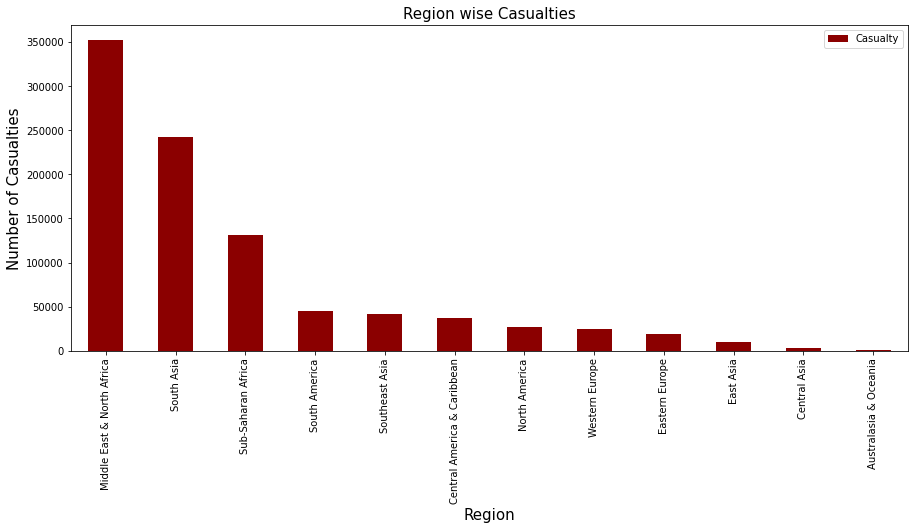

In [24]:
rc.plot(kind="bar",color="darkred",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=15)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

(c) Killed and wounded in each region

In [25]:
#killed
rk=data[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [26]:
rw=data[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


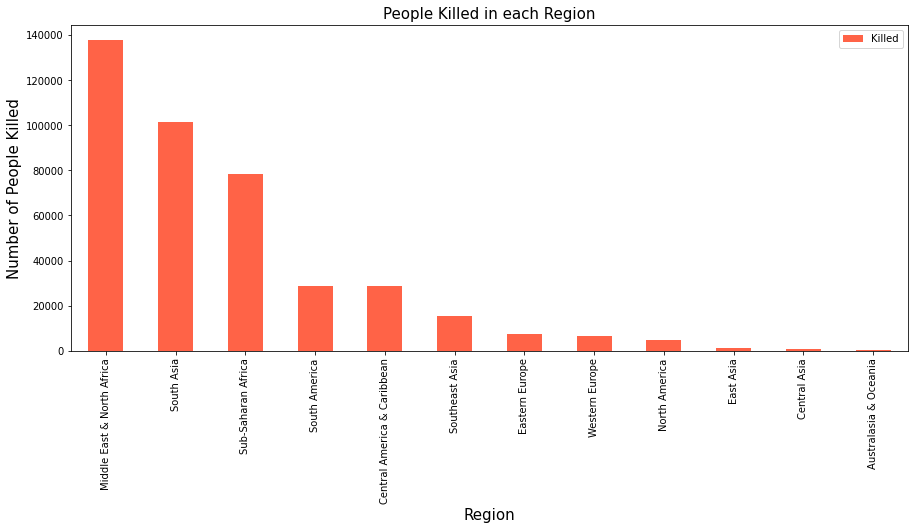

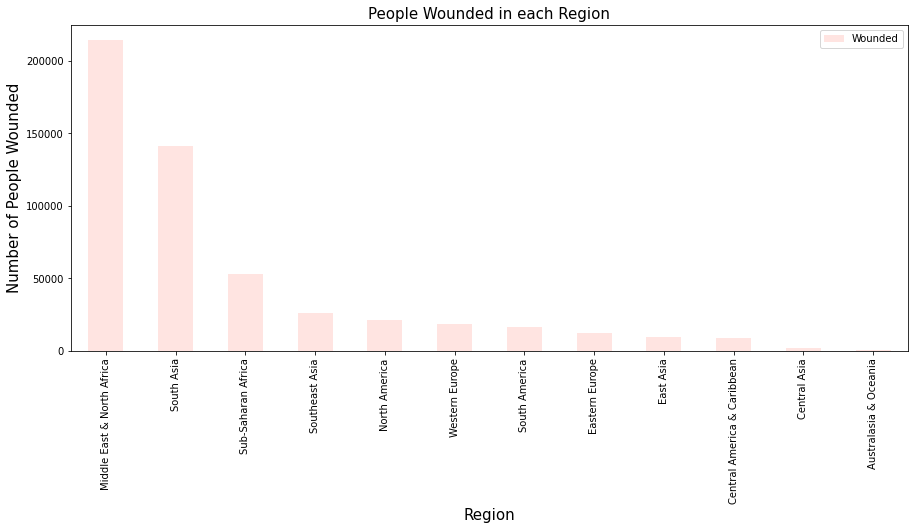

In [27]:
#Killed
rk.plot(kind="bar",color="tomato",figsize=(15,6))
plt.title("People Killed in each Region",fontsize=15)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of People Killed",fontsize=15)

#Wounded
rw.plot(kind="bar",color="mistyrose",figsize=(15,6))
plt.title("People Wounded in each Region",fontsize=15)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of People Wounded",fontsize=15)

plt.show()

**Observations from Region wise Attacks :**

  (a) Attacks

    (i) Most number of attacks: 50474 in "Middle East & North Africa"

    (ii) Least number of attacks: 282 in "Australasia & Oceania"

  (b) Casualties

    (i) Most number of casualties: 351950 in "Middle East & North Africa"

    (ii) Least number of casualties: 410 in "Australasia & Oceania"

  (iii) Killed & Wounded

    (i) Most number of people killed: 137642 in "Middle East & North Africa"

    (ii) Least number of people killed: 150 in "Australasia & Oceania"
  
    (iii) Most number of people wounded: 214308 in "Middle East & North 
Africa"

    (iv) Least number of people wounded: 260 in "Australasia & Oceania"

**3. Attacks(Country-wise(Top-10))**

(a) Number of Attacks in each Country

In [30]:
ct=data["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

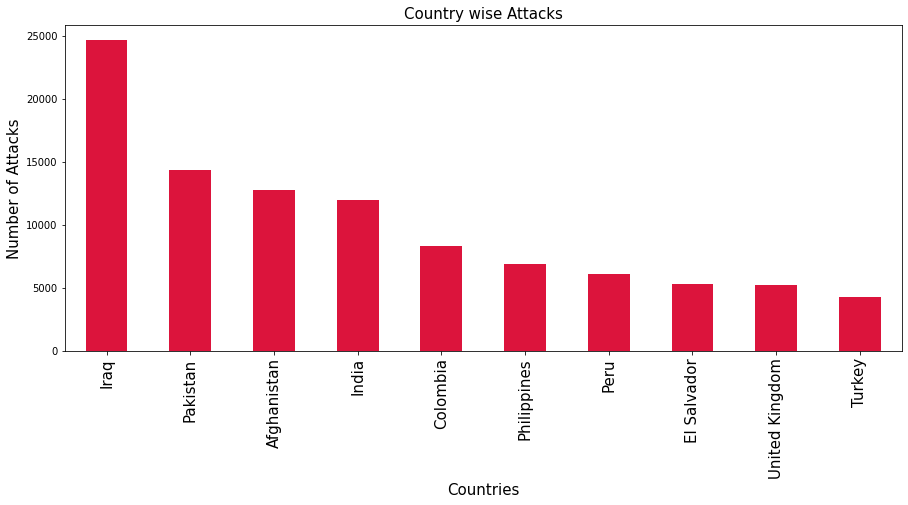

In [31]:
ct.plot(kind="bar",color="crimson",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=15)
plt.xlabel("Countries",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(b) Total Casualties (Killed + Wounded) in each Country

In [32]:
cc=data[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False).head(10)
cc

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


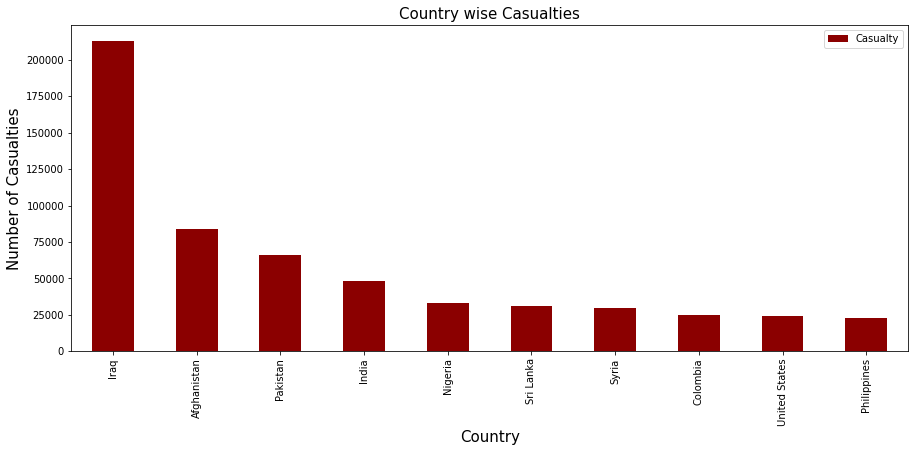

In [33]:
cc.plot(kind="bar",color="darkred",figsize=(15,6))
plt.title("Country wise Casualties",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

(c) Killed and wounded in each country

In [34]:
#killed
ck=data[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False).head(10)
ck

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [35]:
#wounded
cw=data[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False).head(10)
cw

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


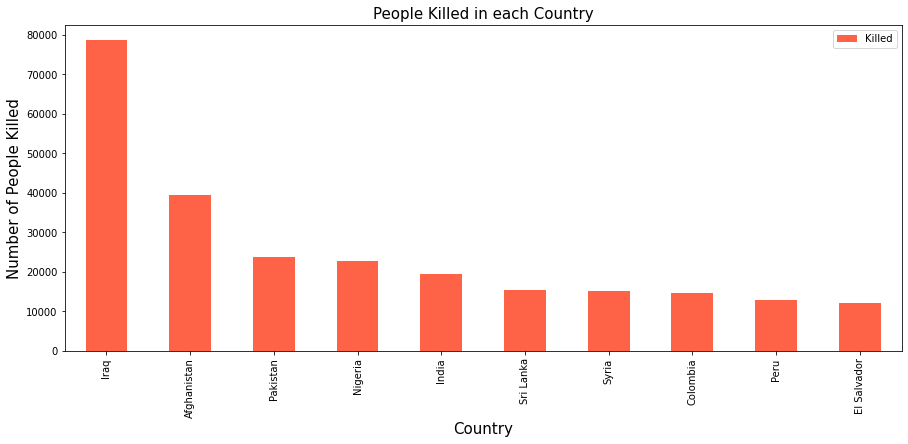

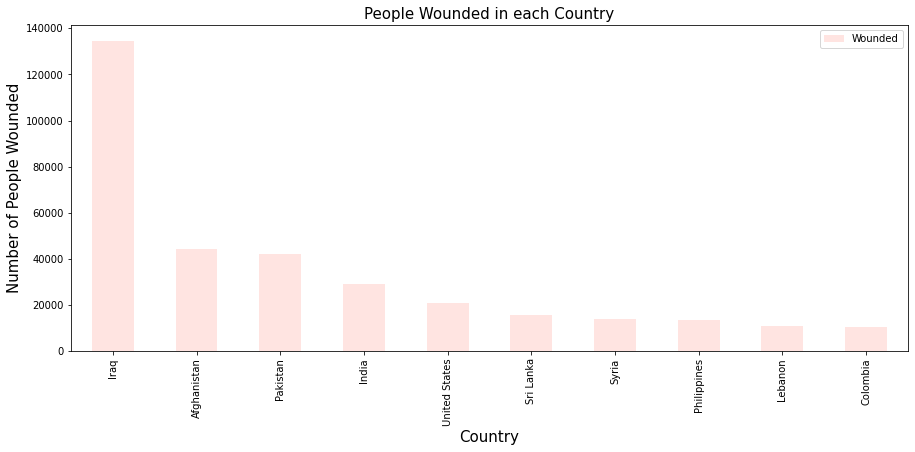

In [36]:
#Killed
ck.plot(kind="bar",color="tomato",figsize=(15,6))
plt.title("People Killed in each Country",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of People Killed",fontsize=15)

#Wounded
cw.plot(kind="bar",color="mistyrose",figsize=(15,6))
plt.title("People Wounded in each Country",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of People Wounded",fontsize=15)

plt.show()

**Observation from Country wise Attacks [Top 10] :**

  (a) Attacks

    (i) Most number of attacks: 24636 in "Iraq"

    (ii) Least number of attacks: 4292 in "Turkey"

  (b) Casualties

    (i) Most number of casualties: 213279 in "Iraq"

    (ii) Least number of casualties: 22926 in "Philippines"

  (c) Killed & Wounded

    (i) Most number of people killed: 78589 in "Iraq"

    (ii) Least number of people killed: 12053 in "El Salvador"

    (iii) Most number of people wounded: 134690 in "Iraq"

    (iv) Least number of people wounded: 10328 in "Colombia"


**4. Attacks(city-wise(Top-10))**

(a) Number of Attacks in each City

In [51]:
city=data["City"].value_counts().drop("Unknown").head(10)
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

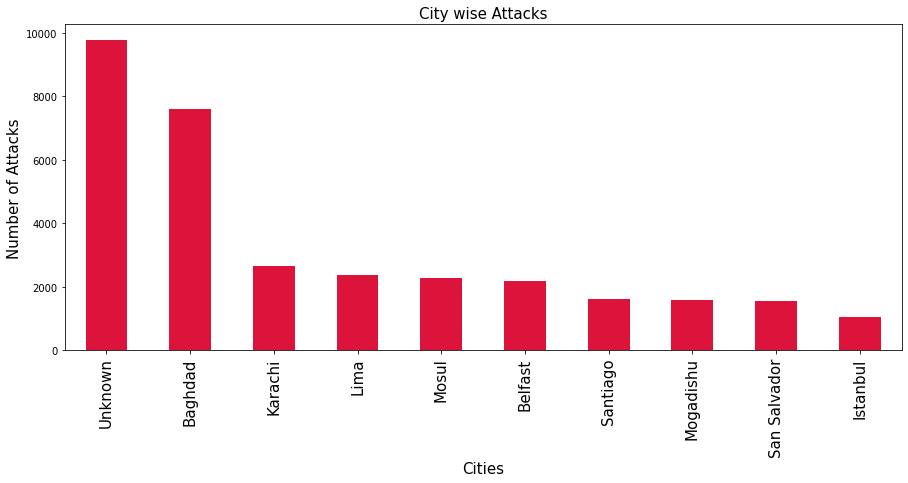

In [39]:
city.plot(kind="bar",color="crimson",figsize=(15,6))
plt.title("City wise Attacks",fontsize=15)
plt.xlabel("Cities",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(b) Total Casualties (Killed + Wounded) in each City

In [49]:
cityc=data[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
cityc

,Casualty
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


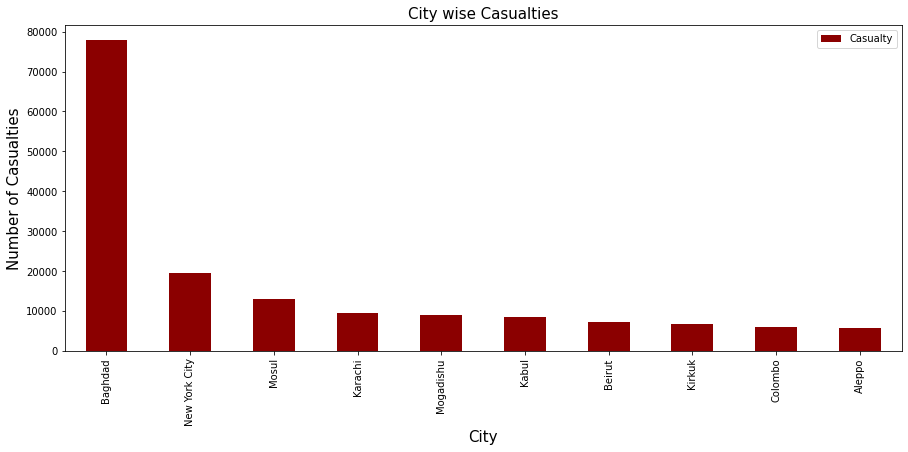

In [50]:
cityc.plot(kind="bar",color="darkred",figsize=(15,6))
plt.title("City wise Casualties",fontsize=15)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

(c) Killed and wounded in each city

In [47]:
#killed
cityk=data[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
cityk

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


In [45]:
#wounded
cityw=data[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
cityw

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


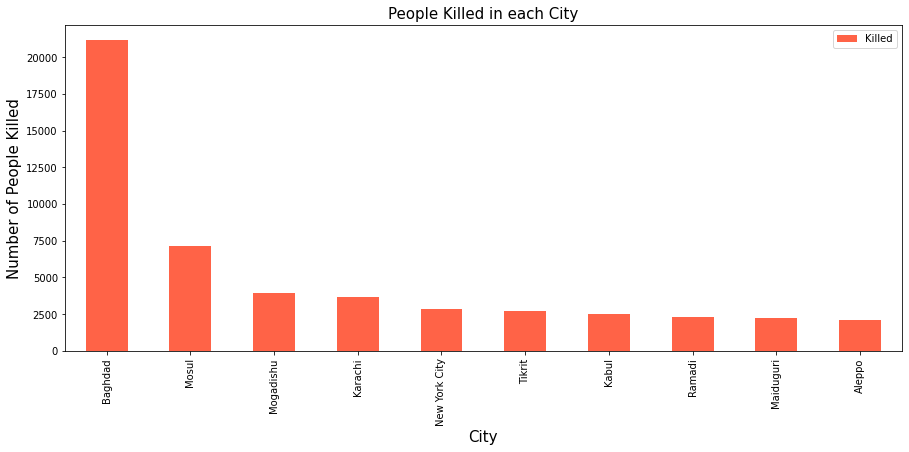

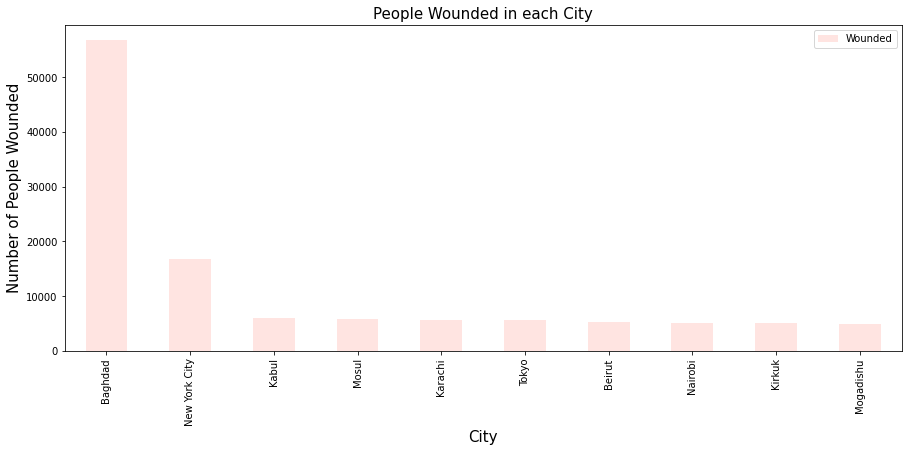

In [48]:
#Killed
cityk.plot(kind="bar",color="tomato",figsize=(15,6))
plt.title("People Killed in each City",fontsize=15)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of People Killed",fontsize=15)

#Wounded
cityw.plot(kind="bar",color="mistyrose",figsize=(15,6))
plt.title("People Wounded in each City",fontsize=15)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of People Wounded",fontsize=15)

plt.show()

**Observations from City wise Attacks [Top 10] :**

  (a) Attacks

    (i) Most number of attacks: 7589 in "Baghdad"

    (ii) Least number of attacks: 1019 in "Athens"

  (b) Casualties

    (i) Most number of casualties: 77876 in "Baghdad"

    (ii) Least number of casualties: 5748 in "Aleppo"

  (c) Killed & Wounded

    (i) Most number of people killed: 21151 in "Baghdad"

    (ii) Least number of people killed: 2125 in "Aleppo"
  
    (iii) Most number of people wounded: 56725 in "Baghdad"

    (iv) Least number of people wounded: 4955 in "Mogadishu"

**5. Terrorist Group wise Attacks - Top 10**

(a) Number of Attacks by each Group

In [52]:
grp=data["Group Name"].value_counts().drop("Unknown").head(10)
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group Name, dtype: int64

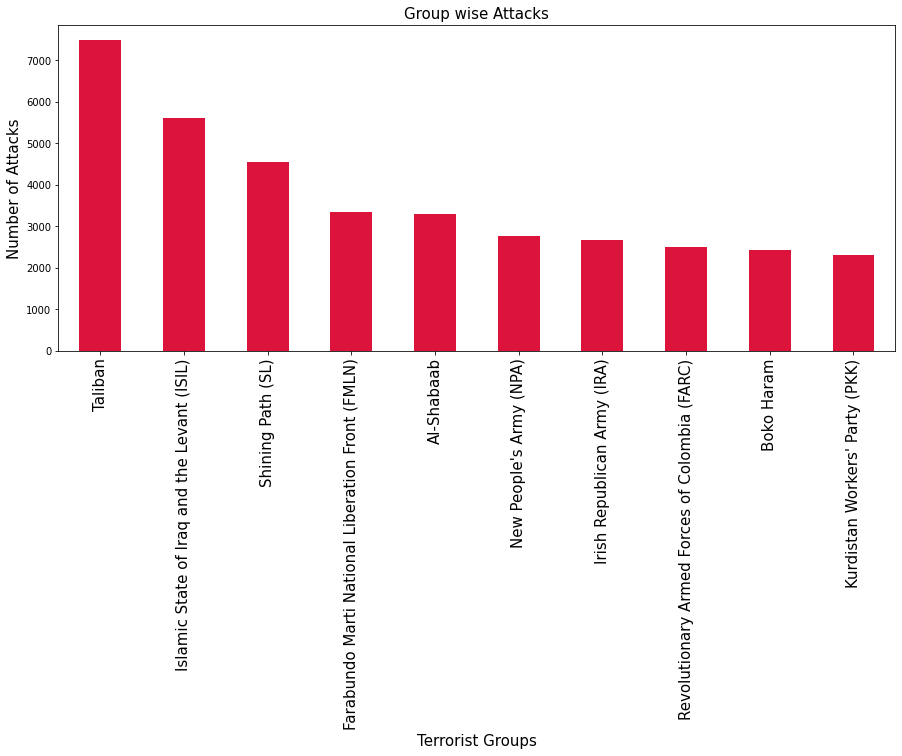

In [53]:
grp.plot(kind="bar",color="crimson",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=15)
plt.xlabel("Terrorist Groups",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(b) Total Casualties(Killed + Wounded) by each Group

In [54]:
gc=data[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gc

,Casualty
Group Name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


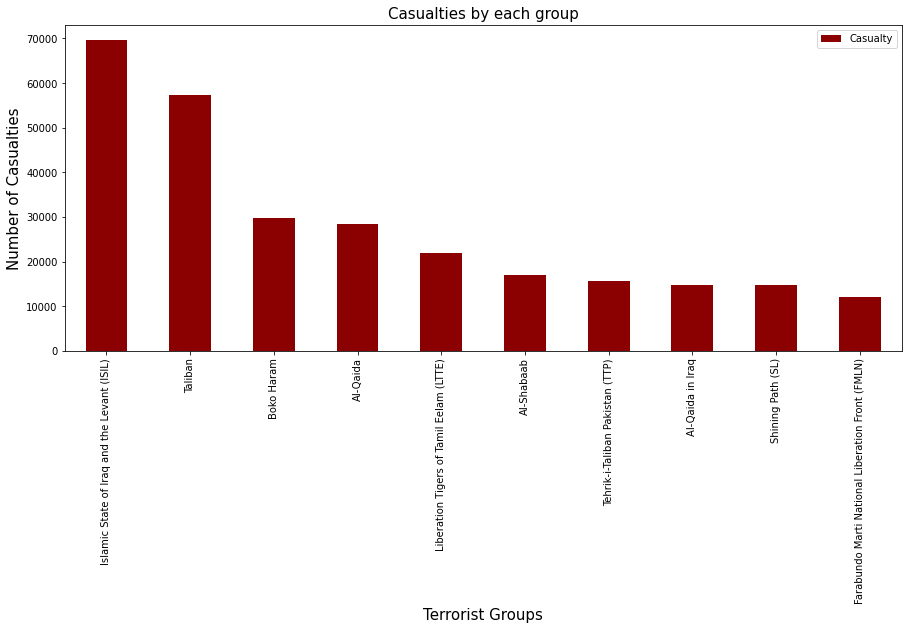

In [57]:
gc.plot(kind="bar",color="darkred",figsize=(15,6))
plt.title("Casualties by each group",fontsize=15)
plt.xlabel("Terrorist Groups",fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

(c) Killed and Wounded by each group

In [58]:
#killed
gk=data[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
gk

,Killed
Group Name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


In [60]:
#wounded
gw=data[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
gw

,Wounded
Group Name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


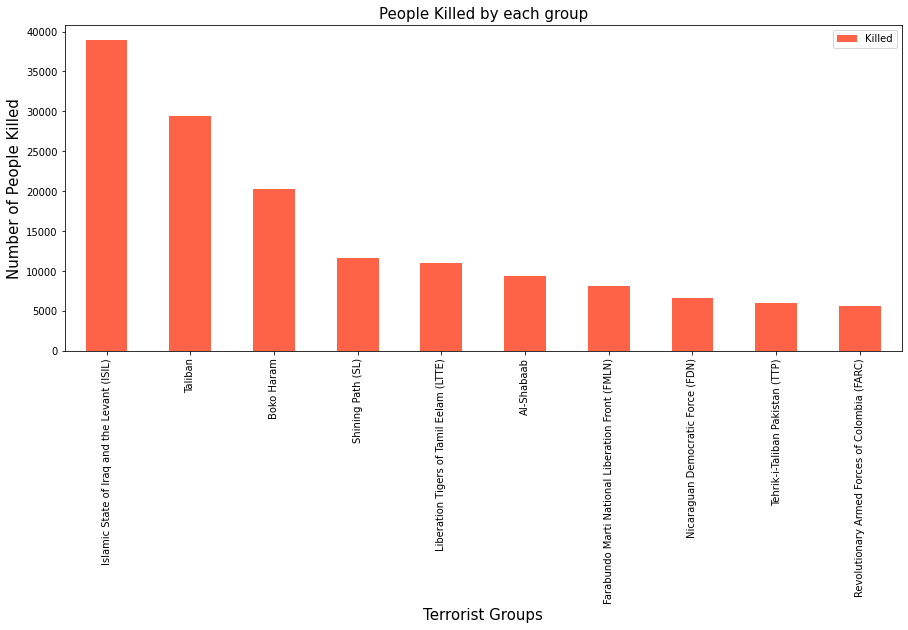

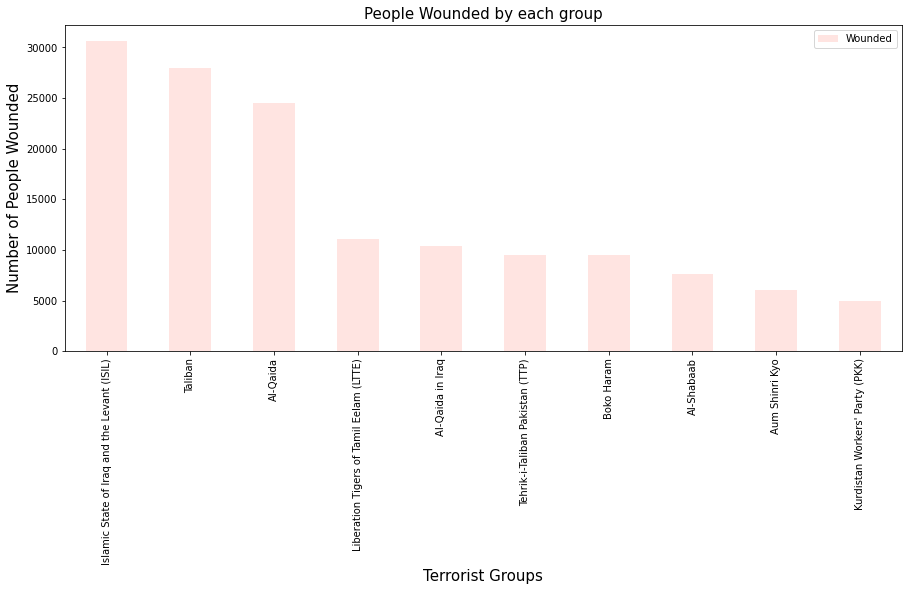

In [61]:
#Killed
gk.plot(kind="bar",color="tomato",figsize=(15,6))
plt.title("People Killed by each group",fontsize=15)
plt.xlabel("Terrorist Groups",fontsize=15)
plt.ylabel("Number of People Killed",fontsize=15)

#Wounded
gw.plot(kind="bar",color="mistyrose",figsize=(15,6))
plt.title("People Wounded by each group",fontsize=15)
plt.xlabel("Terrorist Groups",fontsize=15)
plt.ylabel("Number of People Wounded",fontsize=15)

plt.show()

**Observations from Terrorist Group wise Attacks [Top 10] :**

   (a) Attacks

    (i) Most number of attacks : 7478 by "Taliban"

    (ii) Least number of attacks : 2310 by "Kurdistan Workers' Party (PKK)"

  (b) Casualties

    (i) Most number of casualties : 69595 by "Islamic State of Iraq and the Levant (ISIL)"

    (ii) Least number of casualties : 12130 by "Farabundo Marti National Liberation Front (FMLN)"

  (c) Killed & Wounded

    (i) Most number of people killed : 38923 by "Islamic State of Iraq and the Levant (ISIL)"

    (ii) Least number of people killed : 5661 by "Revolutionary Armed Forces of Colombia (FARC)"


    (iii) Most number of people wounded : 30672 by "Islamic State of Iraq and the Levant (ISIL)"

    (iv) Least number of people wounded : 4908 by "Kurdistan Workers' Party (PKK)"

**6. Attack Type wise Attacks**

(a) Number of Attacks by each Attack Type

In [62]:
at=data["Attack Type"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

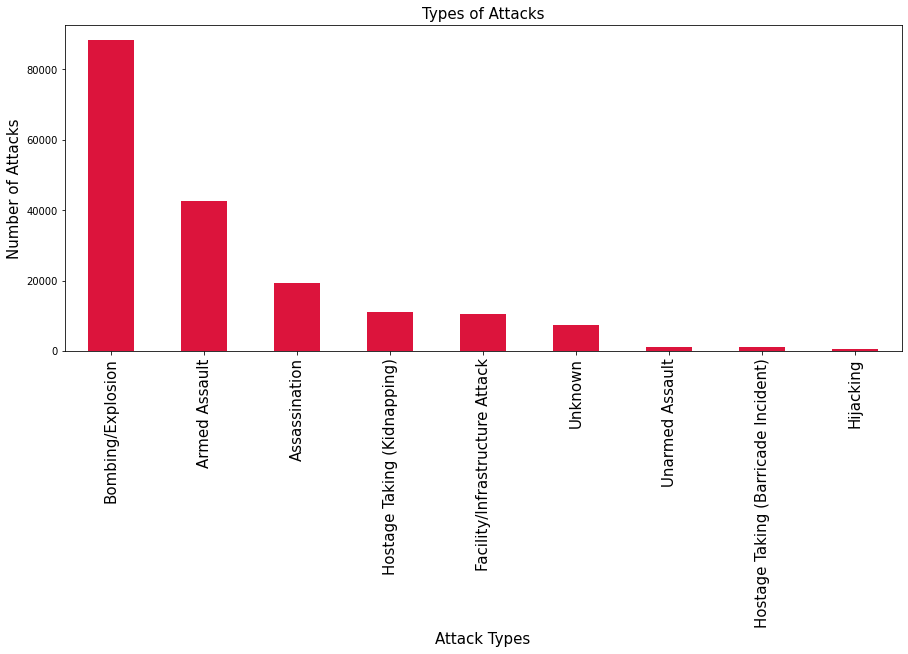

In [63]:
at.plot(kind="bar",color="crimson",figsize=(15,6))
plt.title("Types of Attacks",fontsize=15)
plt.xlabel("Attack Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(b) Total Casualties (Killed + Wounded) by each Attack Type

In [64]:
ac=data[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)
ac

,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


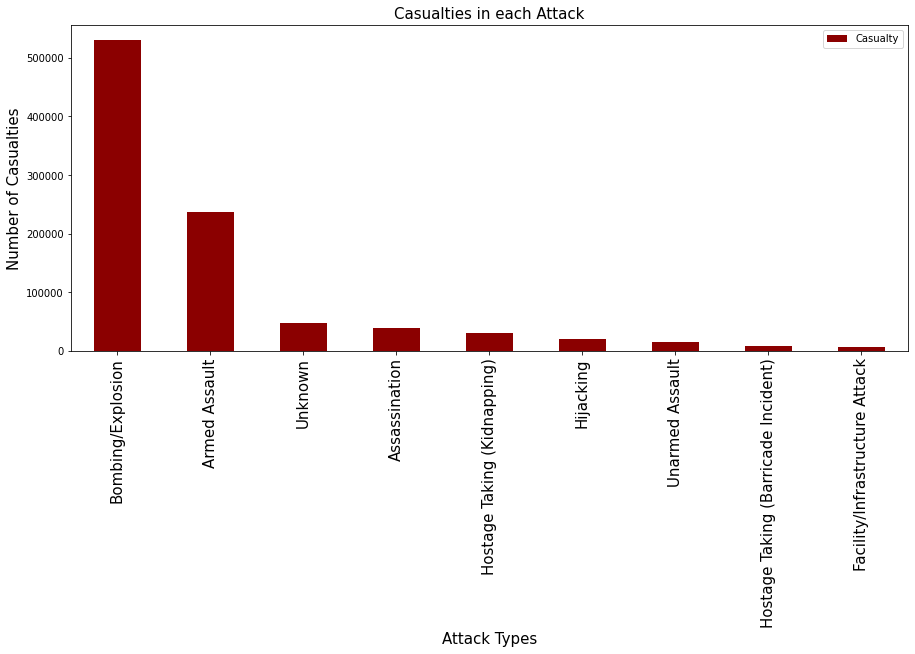

In [66]:
ac.plot(kind="bar",color="darkred",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=15)
plt.xlabel("Attack Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

(c)  Killed and Wounded by each attack type

In [67]:
#killed
ak=data[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
ak

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


In [68]:
#wounded
aw=data[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
aw

,Wounded
Attack Type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


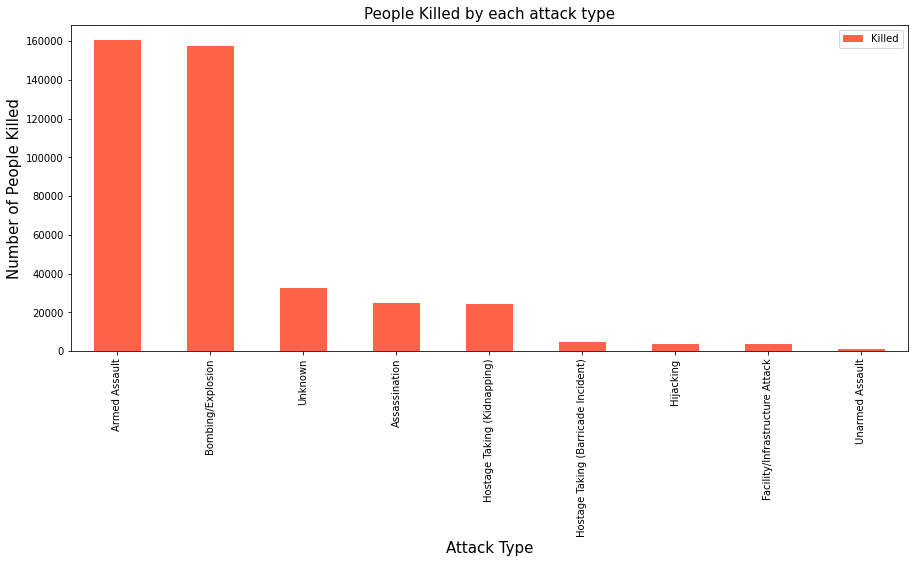

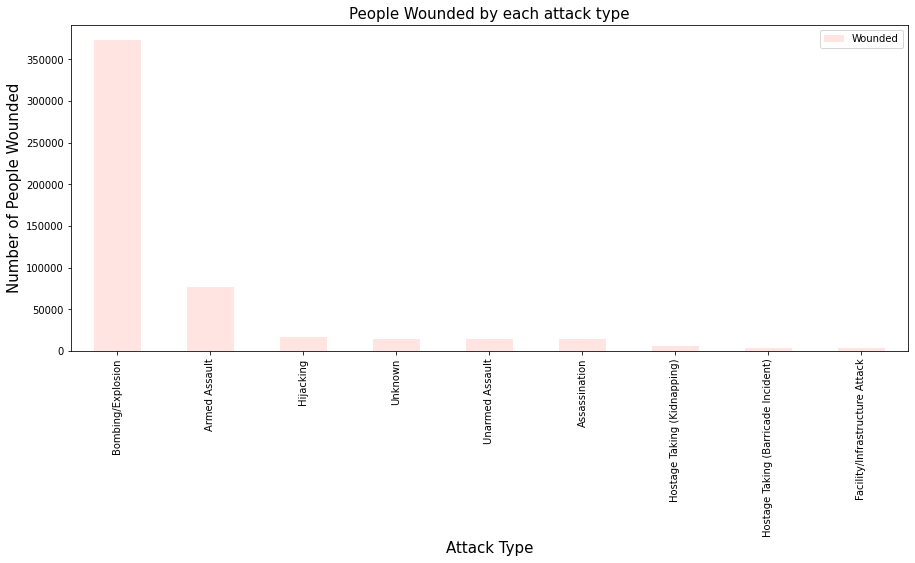

In [69]:
#Killed
ak.plot(kind="bar",color="tomato",figsize=(15,6))
plt.title("People Killed by each attack type",fontsize=15)
plt.xlabel("Attack Type",fontsize=15)
plt.ylabel("Number of People Killed",fontsize=15)

#Wounded
aw.plot(kind="bar",color="mistyrose",figsize=(15,6))
plt.title("People Wounded by each attack type",fontsize=15)
plt.xlabel("Attack Type",fontsize=15)
plt.ylabel("Number of People Wounded",fontsize=15)

plt.show()

**Observations from Attack Type wise Attacks:**

  (a) Attacks

    (i) Most number of attacks : 88255 by "Bombing/Explosion"

    (ii) Least number of attacks : 659 by "Hijacking"

  (b) Casualties

    (i) Most number of casualties : 530007 by "Bombing/Explosion"

    (ii) Least number of casualties : 7407 by "Facility/Infrastructure Attack"

  (c) Killed & Wounded

    (i) Most number of people killed : 160297 by "Armed Assault"

    (ii) Least number of people killed : 880 by "Unarmed Assault"

    (iii) Most number of people wounded : 372686 by "Bombing/Explosion"

    (iv) Least number of people wounded : 3765 by "Facility/Infrastructure Attack"

**7. Target Type wise Attacks**

(a) Number of Attacks over each Target Type

In [71]:
ta=data["Target Type"].value_counts()
ta

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

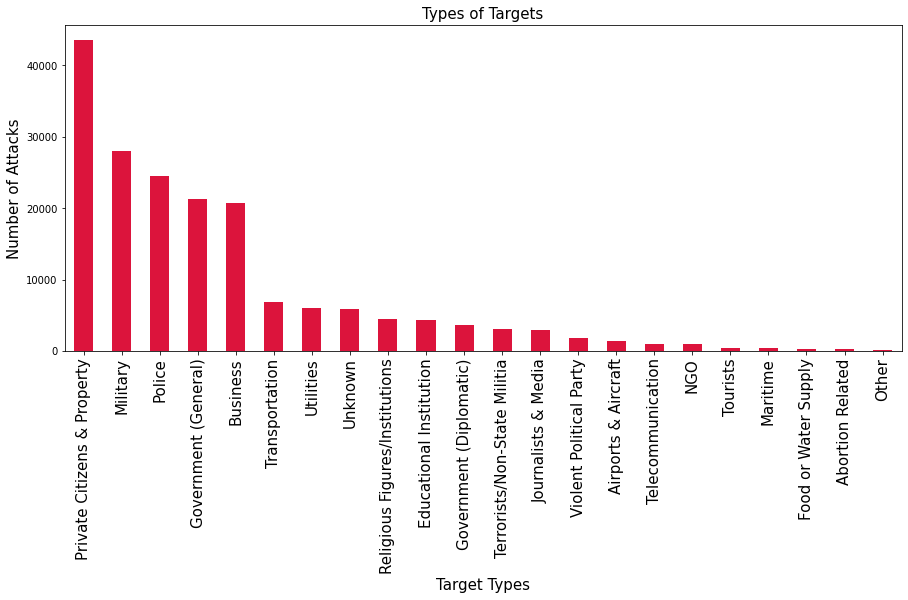

In [75]:
ta.plot(kind="bar",color="crimson",figsize=(15,6))
plt.title("Types of Targets",fontsize=15)
plt.xlabel("Target Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(b) Number of Casualties(Killed + Wounded) by each target 

In [73]:
tc=data[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False)
tc

,Casualty
Target Type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


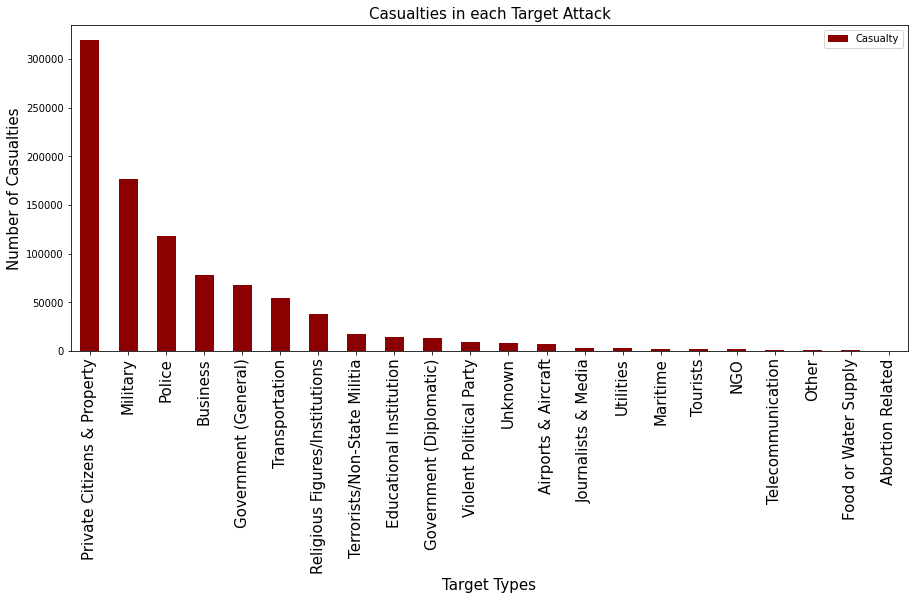

In [76]:
tc.plot(kind="bar",color="Darkred",figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=15)
plt.xlabel("Target Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

(c) Killed and Wounded by each target type

In [78]:
#killed
tk=data[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
tk

,Killed
Target Type,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Unknown,4329.0


In [79]:
#wounded
tw=data[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
tw

,Wounded
Target Type,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0
Transportation,40679.0
Religious Figures/Institutions,24477.0
Government (Diplomatic),10359.0
Educational Institution,10227.0


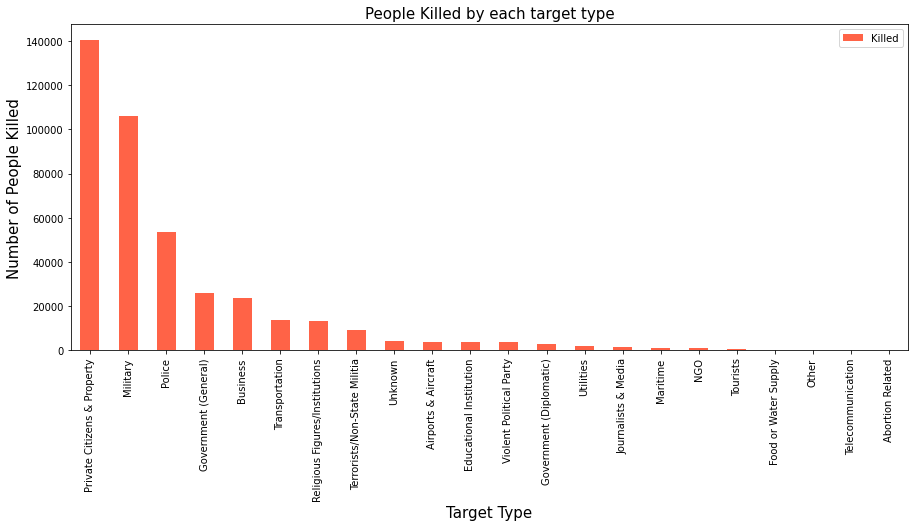

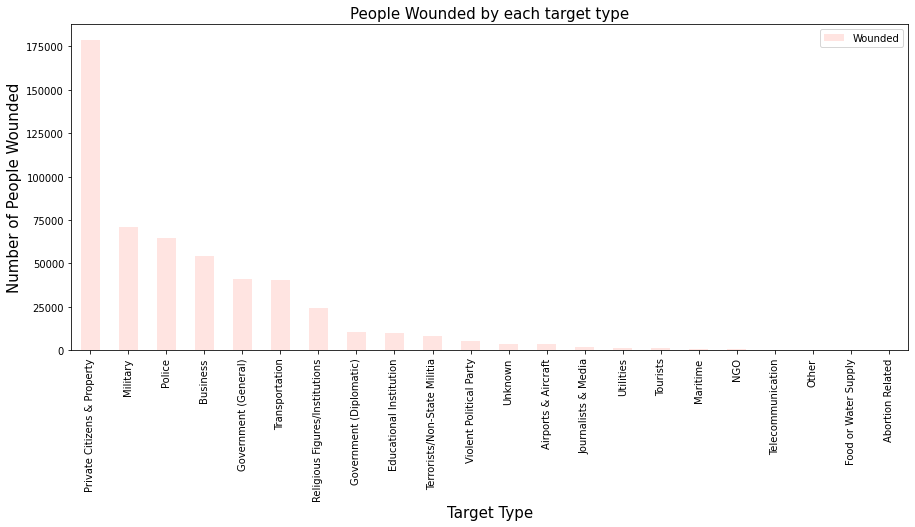

In [80]:
#Killed
tk.plot(kind="bar",color="tomato",figsize=(15,6))
plt.title("People Killed by each target type",fontsize=15)
plt.xlabel("Target Type",fontsize=15)
plt.ylabel("Number of People Killed",fontsize=15)

#Wounded
tw.plot(kind="bar",color="mistyrose",figsize=(15,6))
plt.title("People Wounded by each target type",fontsize=15)
plt.xlabel("Target Type",fontsize=15)
plt.ylabel("Number of People Wounded",fontsize=15)

plt.show()

**Observations from Target Type wise Attacks:**

  (a) Attacks

    (i) Most number of attacks : 43511 over "Private Citizens & Property"

    (ii) Least number of attacks : 263 over "Abortion Related"

  (b) Casualties

    (i) Most number of casualties : 319176 over "Private Citizens & Property"

    (ii) Least number of casualties : 56 over "Abortion Related"

  (c) Killed & Wounded

    (i) Most number of people killed : 140504 over "Private Citizens & Property"

    (ii) Least number of people killed : 10 over "Abortion Related"

    (iii) Most number of people wounded : 178672 over "Private Citizens & Property"

    (iv) Least number of people wounded : 46 over "Abortion Related"

**9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017**

(a) Total Casualties (Killed + Wounded) due to Terrorist Attacks

In [86]:
Casualty=data.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",Casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 935737.0


(b) Killed due to Terrorist Attacks

In [85]:
Killed=data.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",Killed)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 411868.0


(c) Wounded due to Terrorist Attacks

In [93]:
Wounded=data.loc[:,"Wounded"].sum()
print("Total number of people wounded due to Terrorist Attacks from 1970 to 2017 across the world :\n",Wounded)

Total number of people wounded due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0
